**ANORMALY DETECTION USING STATISTICS FORMULA (Z-SCORE)**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Adjust the file path location when necessary

In [30]:
file_path = r"C:\Users\U1078446\Downloads\Processed_TestingMFGData.csv"

In [ ]:
# Load the CSV file
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         1154 non-null   object 
 1   Parameter 1  1154 non-null   float64
 2   Parameter 2  1154 non-null   float64
 3   Parameter 3  1154 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.2+ KB


,Time,Parameter 1,Parameter 2,Parameter 3
0,2025-06-17 23:45:00,36.93,61.39,6.86
1,2025-06-18 00:00:00,36.82,58.43,6.87
2,2025-06-18 00:15:00,36.95,62.15,6.87
3,2025-06-18 00:30:00,36.94,63.31,6.89
4,2025-06-18 00:45:00,37.06,59.93,6.89


In [32]:
# Parse the 'Time' column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

In [33]:
# Parameters to plot
parameters = df.columns.tolist()

Z-Score Function formula

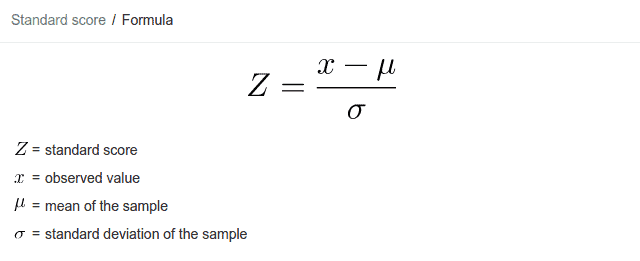

In [34]:
# Function to detect anomalies using z-score
def detect_anomalies(series, threshold=1.9):
    z_scores = np.abs((series - series.mean()) / series.std())
    return z_scores > threshold

In [35]:
# function to detect anomalies
def print_anomalies(series, parameter_name):
    anomalies = series[detect_anomalies(series)]
    if not anomalies.empty:
        print(f"\nTimeStamps in which anomalies are detected in {parameter_name} using Z-Score formula:")
        for ts, val in anomalies.items():
            print(f" - {ts} ; {val}")
    else:
        print(f"\nNo anomalies detected in {parameter_name} using Z-Score formula.")

**Print out all anormalies (Time-Stamps and Value) detected using Z-score**


In [36]:
# Detect and print anomalies for each parameter
for para in parameters:
    print_anomalies(df[para], para)


TimeStamps in which anomalies are detected in Parameter 1 using Z-Score formula:
 - 2025-06-23 11:15:00 ; 36.39
 - 2025-06-23 11:30:00 ; 31.6
 - 2025-06-23 11:45:00 ; 35.4
 - 2025-06-23 12:00:00 ; 35.38
 - 2025-06-23 12:15:00 ; 40.4
 - 2025-06-23 12:30:00 ; 37.75
 - 2025-06-23 13:00:00 ; 36.54
 - 2025-06-23 13:15:00 ; 36.56
 - 2025-06-23 13:30:00 ; 36.56
 - 2025-06-23 13:45:00 ; 36.53

TimeStamps in which anomalies are detected in Parameter 2 using Z-Score formula:
 - 2025-06-18 00:15:00 ; 62.15
 - 2025-06-18 00:30:00 ; 63.31
 - 2025-06-18 01:15:00 ; 63.94
 - 2025-06-18 02:15:00 ; 63.96
 - 2025-06-18 02:30:00 ; 62.41
 - 2025-06-18 03:15:00 ; 64.09
 - 2025-06-18 04:15:00 ; 63.46
 - 2025-06-18 04:30:00 ; 63.1
 - 2025-06-18 05:15:00 ; 64.03
 - 2025-06-18 06:30:00 ; 63.92
 - 2025-06-18 06:45:00 ; 63.42
 - 2025-06-18 08:00:00 ; 62.97
 - 2025-06-18 08:15:00 ; 63.84
 - 2025-06-18 08:30:00 ; 53.23
 - 2025-06-18 09:30:00 ; 62.29
 - 2025-06-18 09:45:00 ; 63.63
 - 2025-06-18 10:00:00 ; 63.1
 - 2

**Plot all the anormalties**

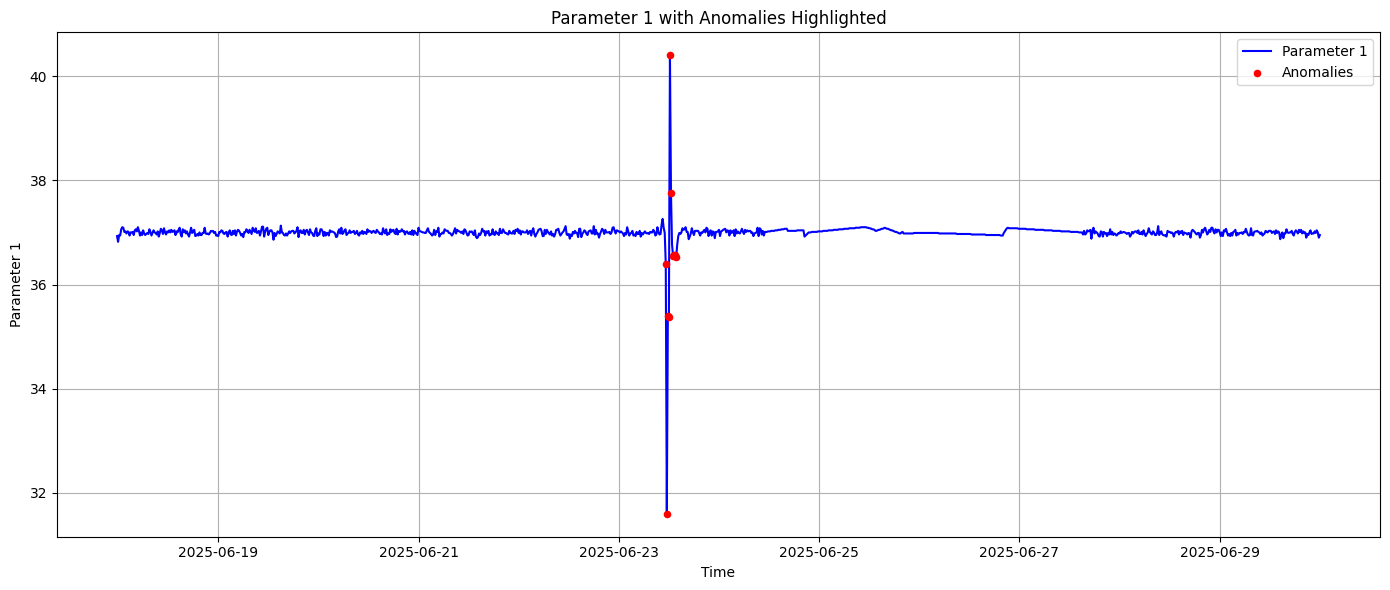

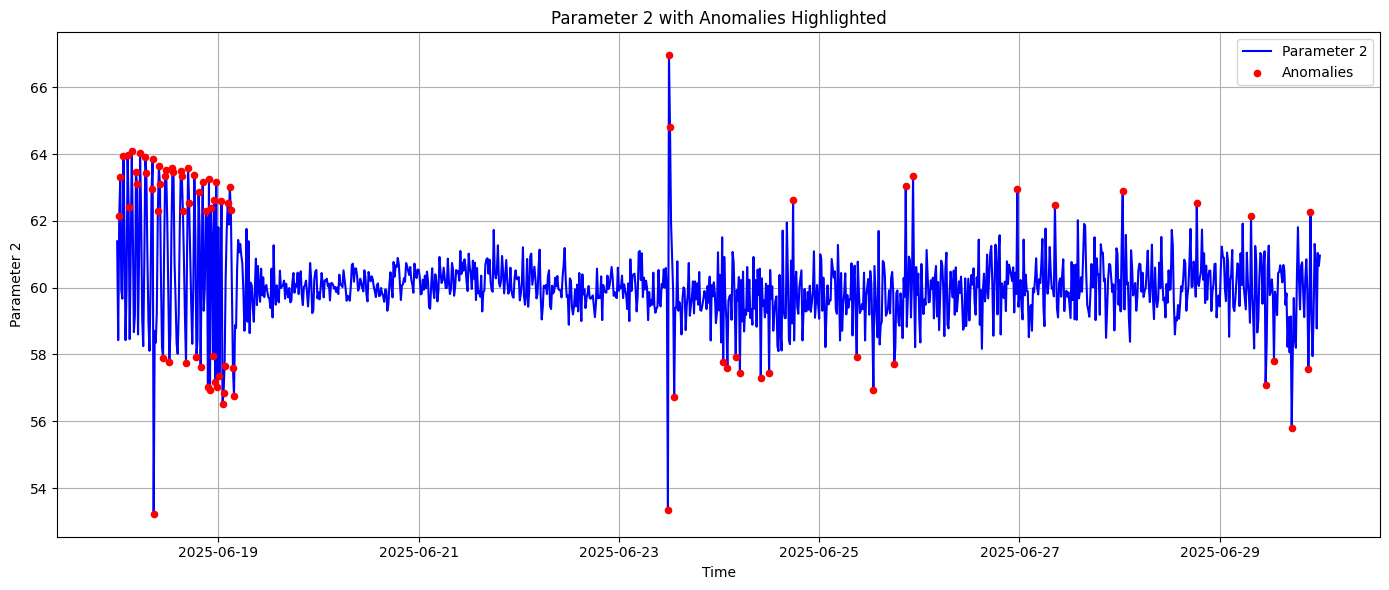

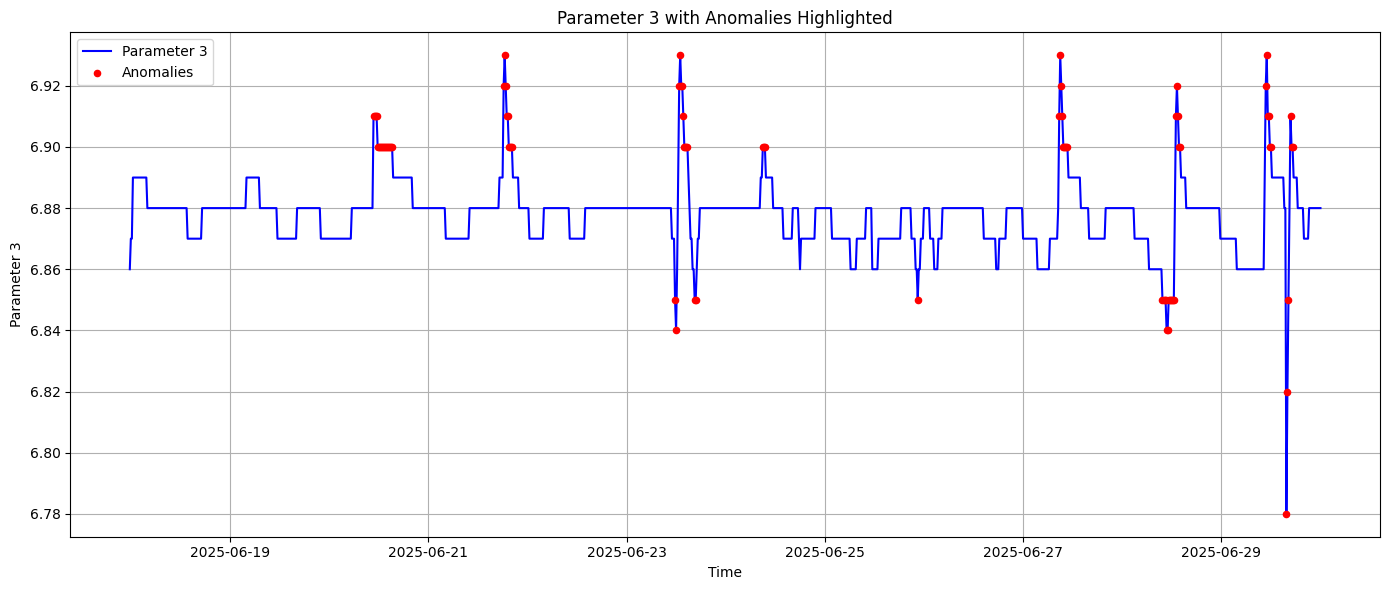

In [37]:
# Plotting the parameters with anomalies highlighted
for para in parameters:
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[para], label=para, color='blue')
    
    # Get anomalies
    anomaly_mask = detect_anomalies(df[para])
    anomalies = df[para][anomaly_mask]
    
    if not anomalies.empty:
        plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies', s=20, zorder=5)
    
    plt.title(f"{para} with Anomalies Highlighted")
    plt.xlabel('Time')
    plt.ylabel(para)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()